# Assignment 2 - Predictive Process Monitoring

*Due: Friday, 16 December, 2022 at 17:00 CET*

In this assignment, you will learn to use several regression models to predict the case remaining time. In addition, you will also show that you can evaluate their performance and discuss the results in a report. The learning objectives of this assignment are: 

- use the data aggregation, feature encoding, and data transformation techniques to preprocess event data
- use the regression models to predict the remaining time of cases. 
- perform cross validation and fine-tune the model parameters of each algorithm
- calculate model performance (e.g., MAE, MSE, RMSE, R^2, etc.)
- design experiments to compare the performance of algorithms
- reflect on the difference between different models


This assignment includes two algorithms: Regression Tree (or Random Forest Regression) and kNN regressor. Following a similar structure as the first assignment, your first task is to perform data exploration and data cleaning. 
In Task 2, you will perform two trace encoding techniques (covered during Lecture 07). 
In Task 3-4, you will use the two algorithms to learn regression models to forecast the remaining time of each case after each event. 
In Task 5, you will compare the algorithms and evaluate their results. 

Please note that Task 3 and 4 have the following structure:
1. First, find the library (e.g., sklearn examples) and try out the algorithm by simply training the model on the training data (do not consider any parameters or cross validation just yet); 
2. Train the model with the training data by using cross validation and find the best parameter setting for the parameters of interest;
3. Report the average MAE, MSE, RMSE, and R^2 of all validation sets;
4. Finally, test the optimal model that has the best fitting parameters on your held-out test data, and report its MAE, MSE, RMSE, and R^2. 

Note that, in Task 5, you will need all the calculated MAE, MSE, RMSE, and R^2 on both encoded data from previous tasks. Make sure you save these to a list or dictionary so you can easily evaluate and compare the results. 



## Task 1: Exploring the data set



### Data set: Sepsis

Import the file *sepsis.csv* to load the Sepsis data set. This real-life event log contains events of sepsis cases from a hospital. Sepsis is a life threatening condition typically caused by an infection. One case represents a patient's pathway through the treatment process. The events were recorded by the ERP (Enterprise Resource Planning) system of the hospital. The original data set contains about 1000 cases with in total 15,000 events that were recorded for 16 different activities. Moreover, 39 data attributes are recorded, e.g., the group responsible for the activity, the results of tests and information from checklists. 

Additional information about the data can be found :
- https://data.4tu.nl/articles/dataset/Sepsis_Cases_-_Event_Log/12707639
- http://ceur-ws.org/Vol-1859/bpmds-08-paper.pdf




In [1]:
%matplotlib inline
!pip install -U pm4py
!pip install graphviz

Requirement already up-to-date: pm4py in c:\users\lardy\anaconda3\lib\site-packages (2.3.3)


In [25]:
import pandas as pd

# Import data

# TODO: Change the file path to your file path
data_Sepsis = pd.read_csv('./sepsis.csv', sep=';')

# create an overview of the data
print(data_Sepsis.describe())
print(data_Sepsis.columns)
print(data_Sepsis.head())


               Age          CRP   LacticAcid   Leucocytes     duration  \
count  5176.000000  5176.000000  5176.000000  5176.000000  5176.000000   
mean     70.191267    33.845634     0.547276     4.700155     8.265385   
std      17.418468    74.729799     1.187220    10.590811    35.952867   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      60.000000     0.000000     0.000000     0.000000     0.000000   
50%      75.000000     0.000000     0.000000     0.000000     0.266667   
75%      85.000000    20.000000     0.700000     8.800000     7.366667   
max      90.000000   573.000000    11.000000   296.200000   782.466667   

             month      weekday         hour       remtime       elapsed  
count  5176.000000  5176.000000  5176.000000   5176.000000   5176.000000  
mean      6.531685     2.930835    11.244397   1193.775889   1574.430835  
std       3.568158     2.018046     8.203143   3469.657735   4087.046260  
min       1.000000     0.000000  


### 1.1 Exploratory data analysis

For the data set, create 2-3 figures and tables that help you understand the data 

**Use the column "remtime" (which indicates the remaining time of each case after each corresponding event) as the response variable for regression**

Note that some of these variables are categorical variables. How would you preprocess these variables?


#### Tips: ---------------

During the data exploration, you, as a team, are trying to get an impression of the data. You will create figures and/or tables that help you to get to know the data. While exploring the data, you may also consider answering the following questions, which may help you understand the data better. For example, 

- How many variables are in the data? What are the data type and the distribution of each variable? 
- What is the discribution of the response variable?
- Are the variables informative?
- Are any pair of the potential predictor variables highly correlated?
- (Should the variables be normalized or not?)
- (Any relevant, useful preprocessing steps that may be taken?)



Make sure to at least check the data type of each variable and to understand the distribution of each variable, especially the response variable. 

Try to find out what factors seem to determine whether an instance is an outlier or not. What do you conclude?

*For creating data visualizations, you may consider using the matplot library and visit the [matplot gallery](https://matplotlib.org/stable/gallery/index.html) for inspiration (e.g., histograms for distribution, or heatmaps for feature correlation).*

DiagnosticArtAstrup           object
DiagnosticBlood               object
DiagnosticECG                 object
DiagnosticIC                  object
DiagnosticLacticAcid          object
DiagnosticLiquor              object
DiagnosticOther               object
DiagnosticSputum              object
DiagnosticUrinaryCulture      object
DiagnosticUrinarySediment     object
DiagnosticXthorax             object
DisfuncOrg                    object
Hypotensie                    object
Hypoxie                       object
InfectionSuspected            object
Infusion                      object
Oligurie                      object
SIRSCritHeartRate             object
SIRSCritLeucos                object
SIRSCritTachypnea             object
SIRSCritTemperature           object
SIRSCriteria2OrMore           object
Age                          float64
Case ID                       object
Activity                      object
Diagnose                      object
org:group                     object
C

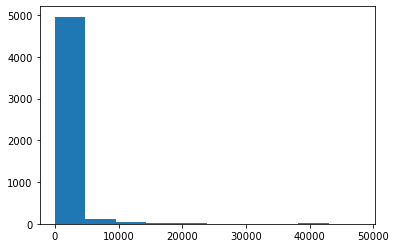

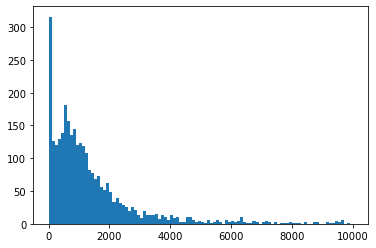

<ipython-input-3-c01fc04cd7ef>:39: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tempData.corr(), annot=False, vmin=-1, vmax=1)


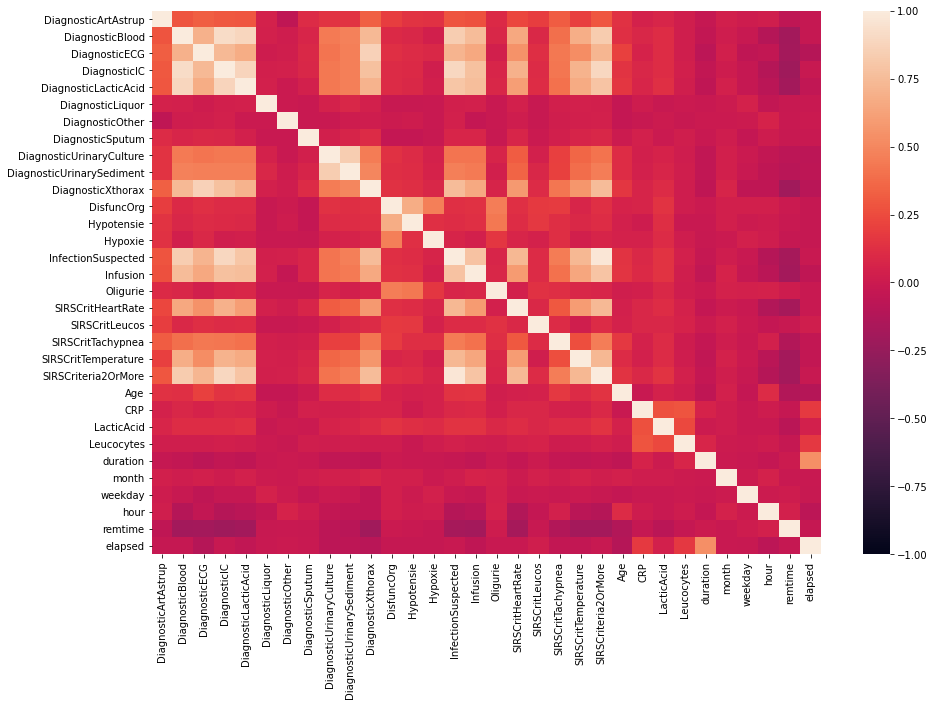

In [3]:
# import packages
import matplotlib.pyplot as plt

remtime = data_Sepsis['remtime']

#----------- PRINT DATATYPES --------
print(data_Sepsis.dtypes)
#------------ HISTOGRAM --------------
plt.hist(remtime)
plt.show()

#As seen in the histogram, there are outliers near remtime = 40000
#By pruning the finished events (remtime = 0), we can see that the result has a right-skewed distribution

plt.hist(remtime[remtime > 0], range=(0,10000), bins=100)
plt.show()

#--------- HEAT MAP ---------
import seaborn as sns
from sklearn import preprocessing
fig = plt.figure(figsize=(15,10))
tempData = data_Sepsis.copy();

booleanValues = ['DiagnosticArtAstrup', 'DiagnosticBlood', 'DiagnosticECG',
       'DiagnosticIC', 'DiagnosticLacticAcid', 'DiagnosticLiquor',
       'DiagnosticOther', 'DiagnosticSputum', 'DiagnosticUrinaryCulture',
       'DiagnosticUrinarySediment', 'DiagnosticXthorax', 'DisfuncOrg',
       'Hypotensie', 'Hypoxie', 'InfectionSuspected', 'Infusion', 'Oligurie',
       'SIRSCritHeartRate', 'SIRSCritLeucos', 'SIRSCritTachypnea',
       'SIRSCritTemperature', 'SIRSCriteria2OrMore']
# #1-hot encoding
# for col in booleanValues:

for col in booleanValues:
  tempData[col] = (tempData[col] == 'True').astype(int)

tempData['remtime'] = preprocessing.normalize([tempData['remtime']])[0]

sns.heatmap(tempData.corr(), annot=False, vmin=-1, vmax=1)
plt.show()

#We can see that there is a negative correlation between remtime and the one-hot encoded columns (diagnostics)



### 1.2 Data cleaning

You have now gathered some information about the data during the data exploration task. You also know from the assignment description that you will be using regression trees and kNN regression models to predict the remaining time.

Based on the above information, decide on which cleaning steps you will need to perform and implement them accordingly.


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Drop rows with missing data
data_Sepsis = data_Sepsis.dropna()

data_Sepsis = data_Sepsis.drop('org:group', axis=1)
# perform data transformation steps if necessary

#Boolean to integer conversion
data_Sepsis[booleanValues] = (data_Sepsis[booleanValues] == 'True').astype(int)


numerical_columns = ['Age','CRP', 'LacticAcid', 'Leucocytes','duration', 'month', 'weekday', 'hour', 'remtime','elapsed']
# Normalize numerical columns
scaler = MinMaxScaler()
scaler.fit(data_Sepsis[numerical_columns])
data_Sepsis[numerical_columns] = scaler.transform(data_Sepsis[numerical_columns])

#One-hot encoding Activity column
dummies = pd.get_dummies(data_Sepsis['Activity'], drop_first=True, prefix="Activity=")
data_Sepsis = data_Sepsis.join(dummies)

#One-hot encoding Diagnosis column
dummies = pd.get_dummies(data_Sepsis['Diagnose'], drop_first=True, prefix="Diagnose=")
data_Sepsis = data_Sepsis.join(dummies)
data_Sepsis = data_Sepsis.drop('Diagnose', axis=1)

# Extract Time Variables
data_Sepsis["Complete Timestamp"] = pd.to_datetime(data_Sepsis["Complete Timestamp"])
data_Sepsis["weekday"] = data_Sepsis["Complete Timestamp"].dt.week
data_Sepsis["month"] = data_Sepsis["Complete Timestamp"].dt.month
data_Sepsis["hour"] = data_Sepsis["Complete Timestamp"].dt.hour
#we ened the complete timesamp for 1.3
# data_Sepsis = data_Sepsis.drop(["Complete Timestamp"], axis=1)


<ipython-input-23-a4fa4873820f>:30: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_Sepsis["weekday"] = data_Sepsis["Complete Timestamp"].dt.week


### 1.3 Process Discovery and Visualization (Optional)

This is an optional task to show you how process discovery and visualizaion can be deployed using the pm4py library. 

(*The following code requires the graphviz library to be installed. If you have issues with installing the graphviz, you may try to follow the instructions on Install GraphViz on the [pm4py](https://pm4py.fit.fraunhofer.de/install-page) install page*)

The following code:
- fill in the columns for case id, activity, and timestamps
- convert the data set into an event log
- discover a Directly-follows graph (DFG) and a process model for each event log. 
- you may use the discovered process model in your report



In [5]:
# # Install pm4py library and graphviz library using pip install 
# # !pip install -U pm4py
# # !pip install graphviz

# import pm4py

# # Fill in the column names of case id, activity, and time stamps
# column_Sepsis_CaseID = 'Case ID' 
# column_Sepsis_Activity = 'Activity'
# column_Sepsis_Timestamps = 'Complete Timestamp'

# data_Sepsis[column_Sepsis_CaseID] = data_Sepsis[column_Sepsis_CaseID].astype(str)


# # Convert the data to an event log
# log_Sepsis = pm4py.format_dataframe(data_Sepsis, case_id=column_Sepsis_CaseID, activity_key=column_Sepsis_Activity, timestamp_key=column_Sepsis_Timestamps)

# # Set the log to be the one that you are interested
# log = log_Sepsis

# # Create a Directly-Follows Graph (DFG) and plot this graph
# dfg, start_activities, end_activities = pm4py.discover_dfg(log)
# pm4py.view_dfg(dfg, start_activities, end_activities)

# # Discover a Process Model using Inductive Miner and plot this BPMN model
# process_tree = pm4py.discover_process_tree_inductive(log)
# bpmn_model = pm4py.convert_to_bpmn(process_tree)
# pm4py.view_bpmn(bpmn_model)


## Task 2: Preprocessing and Trace Encoding


### 2.1 Trace Encoding


- Implement the last-2-state encoding for the data set 
- Implement the aggregated encoding for the data set (for example, see [1], Table 6)


<span style="color:gray">[1] Ilya Verenich, Marlon Dumas, Marcello La Rosa, Fabrizio Maria Maggi, Irene Teinemaa:
Survey and Cross-benchmark Comparison of Remaining Time Prediction Methods in Business Process Monitoring. ACM Trans. Intell. Syst. Technol. 10(4): 34:1-34:34 (2019) [Section 1, 2, 4.1, 4.3, 4.6, 5.2, 5.3, 5.4, and 6] </span>

These two encodings are discussed during lecture 7.
In case you find difficult to implement the algorithms, you may also consider use the pandas functions to help you:
- for the last-2-state encoding, check the pandas groupby.DataFrameGroupBy.shift and see the [answer on the stake overflow](https://stackoverflow.com/questions/53335567/use-pandas-shift-within-a-group)
- for the aggregated encoding check the pandas groupby.DataFrameGroupBy and cumsum function and read the [examples and answers on the stake overflow](https://stackoverflow.com/a/49578219)

In [26]:
# Change the index
data_Sepsis.index = data_Sepsis["Case ID"]
data_Sepsis = data_Sepsis.drop("Case ID", axis=1)
data_Sepsis = data_Sepsis.drop('Activity',axis=1)
# Drop rows with missing data

# TODO: Implement the function that returns the last-state encoding of a log
def last_2_state_encoding(_data, columnCase, columnActivityPrefix):
    #sort values by time
    new_log = _data.sort_values(by=['Complete Timestamp'])
    hot_encoded_activities = [col for col in new_log if col.startswith(columnActivityPrefix)]
    new_log[hot_encoded_activities] = new_log.groupby([columnCase])[hot_encoded_activities].shift()
    new_log = new_log.drop(["Complete Timestamp"], axis=1)

    # drop rows with no prev step
    new_log = new_log.dropna()

    return(new_log)


# TODO: Implement the function that returns the aggregated state encoding of a log
def agg_state_encoding(_data, columnCase, columnActivityPrefix):
    new_log = _data.sort_values(by=['Complete Timestamp'])
    hot_encoded_activities = [col for col in new_log if col.startswith(columnActivityPrefix)]
    new_log[hot_encoded_activities] = new_log.groupby([columnCase])[hot_encoded_activities].cumsum()
    new_log = new_log.drop(["Complete Timestamp"], axis=1)

    # drop rows with no prev step
    new_log = new_log.dropna()
    return(new_log)


# TODO: for each of the two data sets, create a last_2_state encoding and an aggregated state encoding

data_Sepsis_ls = last_2_state_encoding(data_Sepsis.copy(),"Case ID", 'Activity')
print(data_Sepsis_ls)
data_Sepsis_ag = agg_state_encoding(data_Sepsis.copy(),"Case ID", 'Activity=')
print(data_Sepsis_ag)

        DiagnosticArtAstrup DiagnosticBlood DiagnosticECG DiagnosticIC  \
Case ID                                                                  
XJ                    False            True          True         True   
XJ                    False            True          True         True   
XJ                    False            True          True         True   
XJ                    False            True          True         True   
XJ                    False            True          True         True   
...                     ...             ...           ...          ...   
QK                  missing         missing       missing      missing   
QK                  missing         missing       missing      missing   
QK                    False           False          True        False   
QK                    False           False          True        False   
QK                    False           False          True        False   

        DiagnosticLacticAcid Diagnost

### 2.2 Create Training and Held-out test data sets


Create a training and a held-out test data set. *Later in Task 3-4, the training data will be used to perform cross-validation. The held-out test data will be used to evaluate the performance of the selected models.*

Choose the size of your test data. Furthermore, how did you split the data? Motivate your choice when you discuss the experiment setup in your report. 



Tips: *You may consider reuse some of your code from Assignment 1 Task 1.2*

**RESULTS DICTIONARY**




In [7]:
heldoutResults = {}
heldoutResults['regression'] = {}
heldoutResults['regression']['ls'] = {}
heldoutResults['regression']['ag'] = {}
heldoutResults['knn'] = {}
heldoutResults['knn']['ls'] = {}
heldoutResults['knn']['ag'] = {}


## Task 3: Predicting Case Remaining Time - Regression Trees


In this task, you will use the regression tree (or random forest regression if you prefer) to learn a regression model to predict case remaining time. Very similar to how you have trained a classification model in Assignment 1, now perform the following steps to train a regression model. 

i) use the default values for the parameters to get a [Regression Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) (or a [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) running on the training data. (*Optional: visualize the tree, the feature importance, and compute the error measures to get an impression of the performance of the model*).

ii) use 10-fold cross-validation to determine a possibly better choice for the two parameters *min_samples_leaf* and *max_depth*
    
iii) create 2D or 3D plot that shows how the selected parameters affect the performance. 

iv) select the best-performing regression tree (or forest), i.e., the one that achieved the lowest cross-validated errors, and report all the error measures (MAE, MSE, RMSE, R^2) of the fitted model on the held-out test data. 

    
#### TIPS:
You may consider reuse the some of your code of Assignment 1 or use the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class (see an [example](https://www.dezyre.com/recipes/find-optimal-parameters-using-gridsearchcv-for-regression), but be aware that GridSearchSV does not return MAE or the other error measures (e.g., MSE, RMSE, R^2), you will need to update the scoring function)



In [8]:
from sklearn.model_selection import train_test_split

# TODO: create training data and held-out test data for *data_Sepsis_ls*
X_ls = data_Sepsis_ls.drop('remtime', axis=1)
y_ls = data_Sepsis_ls['remtime']

#80% train, 20% test
data_Sepsis_ls_X, data_Sepsis_ls_X_heldout, data_Sepsis_ls_y, data_Sepsis_ls_y_heldout = train_test_split(X_ls,y_ls,test_size=0.2);

# TODO: create training data and held-out test data for *data_Sepsis_ag*
X_ag = data_Sepsis_ag.drop('remtime', axis=1)
y_ag = data_Sepsis_ag['remtime']

#80% train, 20% test
data_Sepsis_ag_X, data_Sepsis_ag_X_heldout, data_Sepsis_ag_y, data_Sepsis_ag_y_heldout = train_test_split(X_ag,y_ag,test_size=0.2);



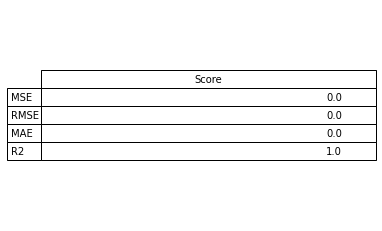

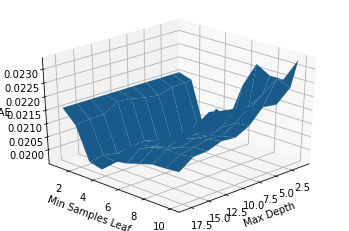

Best Max Depth: 2
Best Min Samples leaf 4


In [9]:
# TODO: import packages
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import SCORERS
from sklearn.model_selection import GridSearchCV
from matplotlib import cm
import numpy as np
# from sklearn.ensemble import RandomForestRegressor

# TODO: using *data_Sepsis_ls* and test the default regression tree model (or the random forest regressor) 
dtr = DecisionTreeRegressor()
dtr.fit(data_Sepsis_ls_X, data_Sepsis_ls_y)
y_pred = dtr.predict(data_Sepsis_ls_X)

mse = mean_squared_error(data_Sepsis_ls_y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(data_Sepsis_ls_y, y_pred)
r2 = r2_score(data_Sepsis_ls_y, y_pred)

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
f = ax.table(cellText=[[mse],[rmse],[mae],[r2]], rowLabels=['MSE','RMSE','MAE','R2'], colLabels=['Score'],loc='center')
f.scale(1,1.5)

# TODO: set the search space of the parameters *min_samples_leaf* and *max_depth*
params = [{'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7,8,9,10],
         'max_depth': [1,2,4,6,8,10,12,14,16,18]}]

# TODO: create 10-fold cross-validation
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']
dtr = DecisionTreeRegressor()
gcv = GridSearchCV(estimator=dtr,
                      scoring=scoring,
                      param_grid=params,
                      refit='r2',
                      cv=10)
# TODO: learn an optimal regression tree model (random forest regressor)
gcv.fit(data_Sepsis_ls_X, data_Sepsis_ls_y)


# TODO: create 2D or 3D plot that shows how the selected parameter values affect the MAE (or RMSE). 
results = pd.DataFrame(gcv.cv_results_)
negMAE = results['mean_test_neg_mean_absolute_error']
MAE = -negMAE
X = params[0]['max_depth']
Y = params[0]['min_samples_leaf']
Z = MAE.values.reshape((len(X),len(Y)))
X,Y = np.meshgrid(X,Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 45)
ax.plot_surface(X, Y, Z)
ax.set_xlabel("Max Depth")
ax.set_ylabel("Min Samples Leaf")
ax.set_zlabel("MAE")
plt.show()

#Store best CV results
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']
best_index = np.nonzero(gcv.cv_results_["rank_test_r2"] == 1)[0][0]
heldoutResults['regression']['ls']['cv_mae'] = results["mean_test_neg_mean_absolute_error"][best_index]
heldoutResults['regression']['ls']['cv_mse'] = results["mean_test_neg_mean_squared_error"][best_index]
heldoutResults['regression']['ls']['cv_rmse'] = results["mean_test_neg_root_mean_squared_error"][best_index]
heldoutResults['regression']['ls']['cv_r2'] = results["mean_test_r2"][best_index]

# TODO: compute the performance of the model on your held-out test data
bestMaxDepth = gcv.best_params_['max_depth']
bestMinSamplesLeaf = gcv.best_params_['min_samples_leaf']
print("Best Max Depth: " + str(bestMaxDepth))
print("Best Min Samples leaf " + str(bestMinSamplesLeaf))

dtr = DecisionTreeRegressor(max_depth=bestMaxDepth, min_samples_leaf=bestMinSamplesLeaf)
dtr.fit(data_Sepsis_ls_X, data_Sepsis_ls_y)
y_pred = dtr.predict(data_Sepsis_ls_X_heldout)

mse = mean_squared_error(data_Sepsis_ls_y_heldout, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(data_Sepsis_ls_y_heldout, y_pred)
r2 = r2_score(data_Sepsis_ls_y_heldout, y_pred)

heldoutResults['regression']['ls']['test_mse'] = mse
heldoutResults['regression']['ls']['test_rmse'] = rmse
heldoutResults['regression']['ls']['test_mae'] = mae
heldoutResults['regression']['ls']['test_r2'] = r2



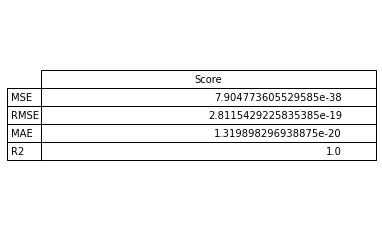

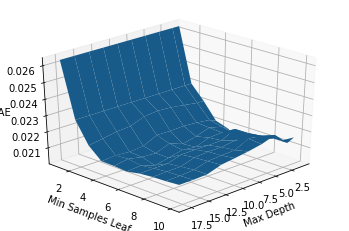

Best Max Depth: 6
Best Min Samples leaf 10


In [10]:
# TODO: repeat the above steps for *data_Sepsis_ag*
dtr = DecisionTreeRegressor()
dtr.fit(data_Sepsis_ag_X, data_Sepsis_ag_y)
y_pred = dtr.predict(data_Sepsis_ag_X)

mse = mean_squared_error(data_Sepsis_ag_y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(data_Sepsis_ag_y, y_pred)
r2 = r2_score(data_Sepsis_ag_y, y_pred)

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
f = ax.table(cellText=[[mse],[rmse],[mae],[r2]], rowLabels=['MSE','RMSE','MAE','R2'], colLabels=['Score'],loc='center')
f.scale(1,1.5)

# TODO: set the search space of the parameters *min_samples_leaf* and *max_depth*
params = [{'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7,8,9,10],
         'max_depth': [1,2,4,6,8,10,12,14,16,18]}]

# TODO: create 10-fold cross-validation
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']
dtr = DecisionTreeRegressor()
gcv = GridSearchCV(estimator=dtr,
                      scoring=scoring,
                      param_grid=params,
                      refit='r2',
                      cv=10)
# TODO: learn an optimal regression tree model (random forest regressor)
gcv.fit(data_Sepsis_ag_X, data_Sepsis_ag_y)


# TODO: create 2D or 3D plot that shows how the selected parameter values affect the MAE (or RMSE). 
results = pd.DataFrame(gcv.cv_results_)
negMAE = results['mean_test_neg_mean_absolute_error']
MAE = -negMAE
X = params[0]['max_depth']
Y = params[0]['min_samples_leaf']
Z = MAE.values.reshape((len(X),len(Y)))
X,Y = np.meshgrid(X,Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 45)
ax.plot_surface(X, Y, Z)
ax.set_xlabel("Max Depth")
ax.set_ylabel("Min Samples Leaf")
ax.set_zlabel("MAE")
plt.show()

#Store best CV results
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']
best_index = np.nonzero(gcv.cv_results_["rank_test_r2"] == 1)[0][0]
heldoutResults['regression']['ag']['cv_mae'] = results["mean_test_neg_mean_absolute_error"][best_index]
heldoutResults['regression']['ag']['cv_mse'] = results["mean_test_neg_mean_squared_error"][best_index]
heldoutResults['regression']['ag']['cv_rmse'] = results["mean_test_neg_root_mean_squared_error"][best_index]
heldoutResults['regression']['ag']['cv_r2'] = results["mean_test_r2"][best_index]

# TODO: compute the performance of the model on your held-out test data
bestMaxDepth = gcv.best_params_['max_depth']
bestMinSamplesLeaf = gcv.best_params_['min_samples_leaf']
print("Best Max Depth: " + str(bestMaxDepth))
print("Best Min Samples leaf " + str(bestMinSamplesLeaf))

dtr = DecisionTreeRegressor(max_depth=bestMaxDepth, min_samples_leaf=bestMinSamplesLeaf)
dtr.fit(data_Sepsis_ag_X, data_Sepsis_ag_y)
y_pred = dtr.predict(data_Sepsis_ag_X_heldout)

mse = mean_squared_error(data_Sepsis_ag_y_heldout, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(data_Sepsis_ag_y_heldout, y_pred)
r2 = r2_score(data_Sepsis_ag_y_heldout, y_pred)

heldoutResults['regression']['ag']['test_mse'] = mse
heldoutResults['regression']['ag']['test_rmse'] = rmse
heldoutResults['regression']['ag']['test_mae'] = mae
heldoutResults['regression']['ag']['test_r2'] = r2



## Task 4. Predicting Case Remaining Time - kNN Regression


In this task, you will use the kNN Regression to learn a regression model to predict case remaining time. The same as task 3, now perform the following steps to train a regression model. 

i) use the default values for the parameters to get a [kNN Regression](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) running on the training data. (*Optional: compute the error measures to get an impression of the performance of the model).

ii) use 10-fold cross-validation to determine a possibly better choice for the two parameters *n_neighbors* and *weights* 
    
iii) create 2D or 3D plot that shows how the selected parameters affect the performance. 

iv) select the best-performing kNN, i.e., the one that achieved the lowest cross-validated errors, and report all the error measures (MAE, MSE, RMSE, R^2) of the fitted model on the held-out test data. 

    
#### TIPS:
The same here, you may consider reuse the some of your code of Assignment 1 or use the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class (see an [example](https://www.dezyre.com/recipes/find-optimal-parameters-using-gridsearchcv-for-regression), but be aware that GridSearchSV does not return MAE or the other error measures (e.g., MSE, RMSE, R^2), you will need to update the scoring function)







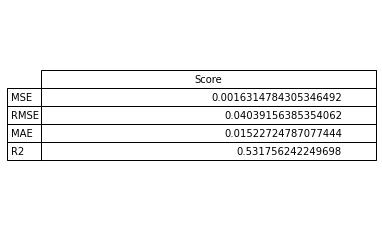

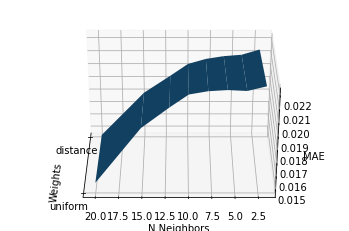

0     0.309222
1     0.353033
2     0.218345
3     0.315908
4     0.124162
5     0.250880
6     0.069315
7     0.203918
8     0.061205
9     0.185771
10    0.070634
11    0.180506
12    0.075134
13    0.171092
14    0.063385
15    0.150304
Name: mean_test_r2, dtype: float64
Best n Neighbours: 2
Best Weights: distance


In [11]:

# TODO: import packages
from sklearn.neighbors import KNeighborsRegressor

# TODO: using *data_Sepsis_ls* and test the default kNN Regressor model 
dtr = KNeighborsRegressor()
dtr.fit(data_Sepsis_ls_X, data_Sepsis_ls_y)
y_pred = dtr.predict(data_Sepsis_ls_X)

mse = mean_squared_error(data_Sepsis_ls_y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(data_Sepsis_ls_y, y_pred)
r2 = r2_score(data_Sepsis_ls_y, y_pred)

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
f = ax.table(cellText=[[mse],[rmse],[mae],[r2]], rowLabels=['MSE','RMSE','MAE','R2'], colLabels=['Score'],loc='center')
f.scale(1,1.5)

# TODO: set the search space of the parameters *n_neighbors* and *weights* 
params = [{'n_neighbors': [2, 4, 6, 8, 10, 12, 15,20],
         'weights': ['uniform','distance']}]

# TODO: create 10-fold cross-validation
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']
dtr = KNeighborsRegressor()
gcv = GridSearchCV(estimator=dtr,
                      scoring=scoring,
                      param_grid=params,
                      refit='r2',
                      cv=10)
# TODO: learn an optimal kNN regressor
gcv.fit(data_Sepsis_ls_X, data_Sepsis_ls_y)


# TODO: create 2D or 3D plot that shows how the selected parameter values affect the MAE (or RMSE). 
results = pd.DataFrame(gcv.cv_results_)
negMAE = results['mean_test_neg_mean_absolute_error']
MAE = -negMAE
X = params[0]['n_neighbors']
X.reverse()
Y = [0,1] #uniform - distance
Z = MAE.values.reshape((len(X),len(Y)))
X,Y = np.meshgrid(Y,X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 180)
ax.plot_surface(X, Y, Z)
ax.set_xlabel("Weights")
ax.set_ylabel("N Neighbors")
ax.set_zlabel("MAE")
ax.set_xticks([0,1])
ax.set_xticklabels(params[0]['weights'])
plt.show()

#Store best CV results
print(results["mean_test_r2"])
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']
best_index = np.nonzero(gcv.cv_results_["rank_test_r2"] == 1)[0][0]
heldoutResults['knn']['ls']['cv_mae'] = results["mean_test_neg_mean_absolute_error"][best_index]
heldoutResults['knn']['ls']['cv_mse'] = results["mean_test_neg_mean_squared_error"][best_index]
heldoutResults['knn']['ls']['cv_rmse'] = results["mean_test_neg_root_mean_squared_error"][best_index]
heldoutResults['knn']['ls']['cv_r2'] = results["mean_test_r2"][best_index]

# TODO: compute the performance of the model on your held-out test data
bestNneighbours = gcv.best_params_['n_neighbors']
bestWeights = gcv.best_params_['weights']
print("Best n Neighbours: " + str(bestNneighbours))
print("Best Weights: " + str(bestWeights))

dtr = KNeighborsRegressor(n_neighbors=bestNneighbours, weights=bestWeights)
dtr.fit(data_Sepsis_ls_X, data_Sepsis_ls_y)
y_pred = dtr.predict(data_Sepsis_ls_X_heldout)

mse = mean_squared_error(data_Sepsis_ls_y_heldout, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(data_Sepsis_ls_y_heldout, y_pred)
r2 = r2_score(data_Sepsis_ls_y_heldout, y_pred)

heldoutResults['knn']['ls']['test_mse'] = mse
heldoutResults['knn']['ls']['test_rmse'] = rmse
heldoutResults['knn']['ls']['test_mae'] = mae
heldoutResults['knn']['ls']['test_r2'] = r2


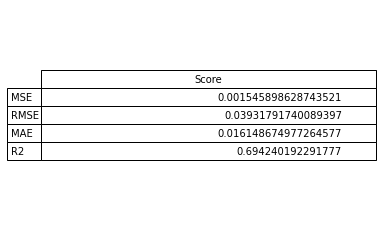

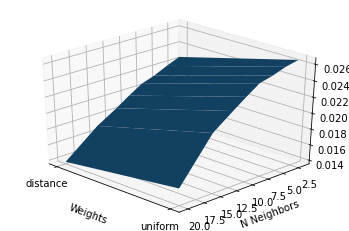

Best n Neighbours: 2
Best Weights: distance


In [12]:

# TODO: import packages
from sklearn.neighbors import KNeighborsRegressor

# TODO: using *data_Sepsis_ag* and test the default kNN Regressor model 
dtr = KNeighborsRegressor()
dtr.fit(data_Sepsis_ag_X, data_Sepsis_ag_y)
y_pred = dtr.predict(data_Sepsis_ag_X)

mse = mean_squared_error(data_Sepsis_ag_y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(data_Sepsis_ag_y, y_pred)
r2 = r2_score(data_Sepsis_ag_y, y_pred)

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
f = ax.table(cellText=[[mse],[rmse],[mae],[r2]], rowLabels=['MSE','RMSE','MAE','R2'], colLabels=['Score'],loc='center')
f.scale(1,1.5)

# TODO: set the search space of the parameters *n_neighbors* and *weights* 
params = [{'n_neighbors': [2, 4, 6, 8, 10, 12, 15,20],
         'weights': ['uniform','distance']}]

# TODO: create 10-fold cross-validation
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']
dtr = KNeighborsRegressor()
gcv = GridSearchCV(estimator=dtr,
                      scoring=scoring,
                      param_grid=params,
                      refit='r2',
                      cv=10)
# TODO: learn an optimal kNN regressor
gcv.fit(data_Sepsis_ag_X, data_Sepsis_ag_y)


# TODO: create 2D or 3D plot that shows how the selected parameter values affect the MAE (or RMSE). 
results = pd.DataFrame(gcv.cv_results_)
negMAE = results['mean_test_neg_mean_absolute_error']
MAE = -negMAE
X = params[0]['n_neighbors']
X.reverse()
Y = [0,1] #uniform - distance
Z = MAE.values.reshape((len(X),len(Y)))
X,Y = np.meshgrid(Y,X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 135)
ax.plot_surface(X, Y, Z)
ax.set_xlabel("Weights")
ax.set_ylabel("N Neighbors")
ax.set_zlabel("MAE")
ax.set_xticks([0,1])
ax.set_xticklabels(params[0]['weights'])
plt.show()

#Store best CV results
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']
best_index = np.nonzero(gcv.cv_results_["rank_test_r2"] == 1)[0][0]
heldoutResults['knn']['ag']['cv_mae'] = results["mean_test_neg_mean_absolute_error"][best_index]
heldoutResults['knn']['ag']['cv_mse'] = results["mean_test_neg_mean_squared_error"][best_index]
heldoutResults['knn']['ag']['cv_rmse'] = results["mean_test_neg_root_mean_squared_error"][best_index]
heldoutResults['knn']['ag']['cv_r2'] = results["mean_test_r2"][best_index]

# TODO: compute the performance of the model on your held-out test data
bestNneighbours = gcv.best_params_['n_neighbors']
bestWeights = gcv.best_params_['weights']
print("Best n Neighbours: " + str(bestNneighbours))
print("Best Weights: " + str(bestWeights))

dtr = KNeighborsRegressor(n_neighbors=bestNneighbours, weights=bestWeights)
dtr.fit(data_Sepsis_ag_X, data_Sepsis_ag_y)
y_pred = dtr.predict(data_Sepsis_ag_X_heldout)

mse = mean_squared_error(data_Sepsis_ag_y_heldout, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(data_Sepsis_ag_y_heldout, y_pred)
r2 = r2_score(data_Sepsis_ag_y_heldout, y_pred)

heldoutResults['knn']['ag']['test_mse'] = mse
heldoutResults['knn']['ag']['test_rmse'] = rmse
heldoutResults['knn']['ag']['test_mae'] = mae
heldoutResults['knn']['ag']['test_r2'] = r2


## Task 5.  Report your results and discuss your findings

By now, you have applied two algorithms with different parameters on the two encodings of the data set. For each algorithm and each encoding, you have created tables or figures which you can add to your report. Discuss the results and their optimal performance. 

Create an overview table or figure that shows the optimal performance of each algorithm on the data set, for example, see the table here below. 


Discuss your findings and reflect on the following questions in your report:
- According to the error measures, which one would you suggest as the optimal model? 
- Are there any discrepancies between the MAE, MSE, RMSE, and R^2 measures in terms of which model performs the best? If yes, how would you explain these discrepancies. 
- Which one of the MAE, MSE, RMSE, and R^2 would you use for selecting the model? Why?
- Which one of the encoding would you suggest for this data set? Why?
- Which features have a big influence on predicting the remaining time?







| Encoding | Model | CV MAE  | Test MAE |  CV MSE  |  Test MSE  | CV R^2 | Test R^2 |... |
|------|------|------|------|------|------|------|------|-----|
|  Last-2-state | Regression Tree        |  |  | | | | |
|  Agg-state |  Regression Tree  |  |  | || | |
|   Last-2-state |kNN       |  |  | || | |
|   ... |...       |  |  | || | |











In [13]:
#heldoutResults


#[list(heldoutResults['regression']['ls'].values()), list(heldoutResults['regression']['ag'].values()), list(heldoutResults['knn']['ls'].values()), list(heldoutResults['knn']['ag'].values())]
rowCount = len(tableData)
rowLabels = ['Last-2-state - Regression','Agg-state - Regression', 'Last-2-state - kNN','Agg-state - kNN']
colLabels = ['CV MAE', 'Test MAE', 'CV MSE', 'Test MSE', 'CV RMSE', 'Test RMSE', 'CV R^2', 'Test R^2']

colVar = ['cv_mae', 'test_mae', 'cv_mse', 'test_mse', 'cv_rmse', 'test_rmse', 'cv_r2', 'test_r2']
rowVarPairs = [(y,x) for x in ['ls','ag'] for y in ['regression','knn']]

tableData = []
for row in rowVarPairs:
  dat = [heldoutResults[row[0]][row[1]][x] for x in colVar]
  print(dat)
  tableData.append(dat)


ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
f = ax.table(cellText=tableData, rowLabels=rowLabels, colLabels=colLabels,loc='center')
f.scale(3,3.5)


NameError: name 'tableData' is not defined

## Bonus Tasks 

We would like to challenge you with the following bonus tasks. For each task that is successfully completed, you may obtain max. 1 extra point. 

1. Implement or use another regression algorithm (for example, [Random Forest Regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html), [LinearRegresion](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [SVM Regression](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py)) or design your own algorithm that achieves a better MAE measure. Explain this in your report.
2. Implement techniques (e.g., preprocessing, feature engineering, feature selection, sampling) that help improve the MAE scores of existing models. For example, try out a feature selection for kNN or implement inter-case features. Explain this in your report.

